In [113]:
import sys
print("Python Executable Path:", sys.executable) #String that contains absolute path to Python interpreter
import os #imports operating system (desktop)
print("Operating System Desktop Path:", os.getcwd())


Python Executable Path: /Users/mmandig/miniconda3/bin/python
Operating System Desktop Path: /Users/mmandig/Desktop


In [114]:
from Bio import SeqIO # Import Biopython's Sequence Input/Output interface
from Bio.Seq import Seq   # Import Biopython's Seq class
from Bio.SeqIO.FastaIO import SimpleFastaParser #Imports Parser for Large Files   
import pandas as pd       # Import Pandas for data manipulation
import numpy as np 
import math as math       # Import scientific and mathematic calculations
import matplotlib.pyplot as plt #Import matplotlib for visualizations
from itertools import compress
from collections import Counter

In [115]:
file_path = "HIV1_ALL_2022_env_PRO.fasta"

#The SeqIO allows to parse the data frame

sequence_records = []
with open(file_path) as fasta_file:
        for record in SeqIO.parse(fasta_file , "fasta"):
            sequence_records.append({
                "Header": str(record.id),
                "Sequence": (record.seq)  
            })

seq_df = pd.DataFrame.from_records(sequence_records)


In [116]:
#This line creates a seperate table for the sequence data and converts it into a string 
seq_data = seq_df["Sequence"].astype(str)

#This line splits the string into five categories and creates 5 columns
id = seq_df['Header'].str.split(".", n = 4 ,expand=True)
id.rename(columns={0: "Subtype", 1: "Country", 2: "Year", 3: "Sequence ID", 4: "Sequence Accession Number"}, inplace= 'TRUE')
id.insert(5, "Sequence Data", seq_data) 
id
id = id[~id["Year"].isin(["x"]) & ~id["Country"].isin(["x"])]
id["Year"] = pd.to_numeric(id["Year"], errors="coerce")

#Drop rows where Year could not be converted
id = id.dropna(subset=["Year"])

#Convert the values to integer
id["Year"] = id["Year"].astype(int)

unique_num = id['Year'].drop_duplicates()
unique_num_sort = unique_num.sort_values()
if id["Year"].max() < 3000:  
    id.loc[id["Year"] < 75, "Year"] += 2000
    id.loc[(id["Year"] > 75) & (id["Year"] < 2000), "Year"] += 1900


In [117]:

USMHRP_RV144_query = id.query('Subtype in ("01_AE") & Country in ("TH") & Year >= 2003 & Year <= 2006')

print(USMHRP_RV144_query)

     Subtype Country  Year    Sequence ID Sequence Accession Number  \
7273   01_AE      TH  2003         TH7229                  KU168309   
7274   01_AE      TH  2004     04TH107542                  JN248318   
7275   01_AE      TH  2004     04TH328531                  JN248324   
7276   01_AE      TH  2004     04TH427990                  JN248327   
7277   01_AE      TH  2004     04TH505841                  JN248328   
...      ...     ...   ...            ...                       ...   
7388   01_AE      TH  2006      AA127a02R                  JX448279   
7389   01_AE      TH  2006      AA129a02R                  JX448289   
7390   01_AE      TH  2006      AA130a07R                  JX448301   
7391   01_AE      TH  2006  T501602_sga01                  JF297225   
7392   01_AE      TH  2006  T614109_sga02                  HQ691082   

                                          Sequence Data  
7273  MRVR--ETQ--M----N-W-------P-NL---W------------...  
7274  MRVK--ETQ--M----N-W------

## Shannon Entropy Calculation

In [118]:
def shannon_entropy (invar):

    # if the input variable is a string, then split the string into a list
    symbol_set = invar
    if isinstance (symbol_set, str):
        symbol_set = list (symbol_set)

    # create a dictionary of symbol frequencies
    setLen = len (symbol_set)
    symbolDict = {}
    for symbol in symbol_set:
        if symbol in symbolDict:
            symbolDict[symbol] += 1
        else:
            symbolDict[symbol] = 1

    # and finally, sum the entropy contributions for each symbol and return
    # the result
    entropy = 0.0
    for symbol in symbolDict:
        fraction = float (symbolDict[symbol]) / setLen
        entropy += fraction * math.log (fraction, 2)
    return (entropy * -1)

In [119]:
n_positions = len(seq_data[0])
entropyResults = [0] * n_positions #This empty list stores the amino acids characters found at that position across all sequences 

for pos in range(n_positions):
    aaChars = [] #initialize a list for storing our characters as position "pos"
    for seq in seq_data:
       aaChars.append(seq[pos]) #Append the character at position "pos" in sequence "seq" to the "aaChars" list
    entropyResults[pos] = shannon_entropy (aaChars)

# Reference Sequences RV 144

In [120]:
#This code calculates the Shannon entropy of the USMHRP RV144 reference sequence data

USMHRP_RV144_seq_data = USMHRP_RV144_query["Sequence Data"]

#print(USMHRP_RV144_seq_data.count()) - 120 sequences

USMHRP_RV144_entropy = [0] * n_positions
for pos in range(n_positions):
    aaChars = [] #initialize a list for storing our characters as position "pos"
    for USMHRP_RV144 in USMHRP_RV144_seq_data: 
       aaChars.append(USMHRP_RV144[pos]) #Append the character at position "pos" in sequence "seq" to the "aaChars" list
    #USMHRP_RV144_entropy[pos] = shannon_entropy (aaChars)

    entropy_value = shannon_entropy(aaChars)  
    USMHRP_RV144_entropy[pos] = 0.0 if entropy_value == -0.0 else entropy_value  # Convert -0.0 to 0.0


USMHRP_RV144_entropy_10 = USMHRP_RV144_entropy[:10]
print(USMHRP_RV144_entropy_10)

print(USMHRP_RV144_entropy)
print(n_positions)


[0.06952964699480783, 0.4822958260288636, 0.21084230031853213, 1.241094823127904, 0.0, 0.0, 0.9796969663540716, 0.16866093149667025, 0.34897841548534736, 0.0]
[0.06952964699480783, 0.4822958260288636, 0.21084230031853213, 1.241094823127904, 0.0, 0.0, 0.9796969663540716, 0.16866093149667025, 0.34897841548534736, 0.0, 0.0, 0.7238386951152931, 0.0, 0.0, 0.0, 0.0, 0.9102255026120049, 0.0, 0.1222915970693747, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23788490446716992, 0.0, 0.4399456644011146, 0.6593378079029247, 0.0, 0.0, 0.0, 0.13895826373604137, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0665408054991348, 0.1916183273480325, 0.0, 0.0, 0.0, 0.1222915970693747, 0.0, 0.28639695711595625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06952964699480783, 0.0, 0.0, 0.0, 0.4822958260288636, 0.0, 0.0, 0.0, 0.06952964699480783, 0.0, 0.41698826854975235, 0.0, 0.0, 0.0, 0.6394584702161336, 0

In [121]:
#This code adds the unfiltered columns into a dataframe

filtered_lanl_map = pd.read_csv("/Users/mmandig/Downloads/Fred Hutch HIV maps/lanl_env_aa_2022.map", sep="|")

filtered_lanl_map.insert(3, "Filtered Reference Entropy", USMHRP_RV144_entropy)
print(filtered_lanl_map)

filtered_lanl_map['hxb2Pos'] = pd.to_numeric(filtered_lanl_map['hxb2Pos'], errors='coerce')
filtered_lanl_map= filtered_lanl_map.dropna()
filtered_lanl_map['hxb2Pos'] = filtered_lanl_map['hxb2Pos'].astype(int) #Store conversion of type back into Dataframe
filtered_lanl_map = filtered_lanl_map.drop(filtered_lanl_map[
    filtered_lanl_map['hxb2Pos'].between(132, 152) |
    filtered_lanl_map['hxb2Pos'].between(185, 190) |
    filtered_lanl_map['hxb2Pos'].between(396, 410) |
    filtered_lanl_map['hxb2Pos'].between(460, 467)
    
    ].index)

print(filtered_lanl_map)


      posNum hxb2Pos hxb2aa  Filtered Reference Entropy
0          1       1      M                    0.069530
1          2       2      R                    0.482296
2          3       3      V                    0.210842
3          4       4      K                    1.241095
4          5      4a      -                    0.000000
...      ...     ...    ...                         ...
2164    2165     855      L                    0.000000
2165    2166     856      L                    1.157070
2166    2167    856a      -                    0.000000
2167    2168    856b      -                    0.000000
2168    2169     857      *                    0.000000

[2169 rows x 4 columns]
      posNum  hxb2Pos hxb2aa  Filtered Reference Entropy
0          1        1      M                    0.069530
1          2        2      R                    0.482296
2          3        3      V                    0.210842
3          4        4      K                    1.241095
6          7      

In [122]:
#This code checks then filtered LANL map 
print(filtered_lanl_map[:10])
print(filtered_lanl_map)

    posNum  hxb2Pos hxb2aa  Filtered Reference Entropy
0        1        1      M                    0.069530
1        2        2      R                    0.482296
2        3        3      V                    0.210842
3        4        4      K                    1.241095
6        7        5      E                    0.979697
7        8        6      K                    0.168661
8        9        7      Y                    0.348978
11      12        8      Q                    0.723839
15      16        9      H                    0.000000
16      17       10      L                    0.910226
      posNum  hxb2Pos hxb2aa  Filtered Reference Entropy
0          1        1      M                    0.069530
1          2        2      R                    0.482296
2          3        3      V                    0.210842
3          4        4      K                    1.241095
6          7        5      E                    0.979697
...      ...      ...    ...                         

# Study Sequences RV144

In [123]:
#This code creates a dataframe of the unfiltered data and then filters after
usmhrp_rv144_env_map = pd.read_csv("/Users/mmandig/Downloads/Fred Hutch HIV maps/training_studies/rv144/map/env.map", sep="|")
usmhrp_rv144_env_map

,posNum,hxb2Pos,hxb2aa
0,1,1,M
1,2,2,R
2,3,3,V
3,4,4,K
4,5,5,E
...,...,...,...
1006,1007,853,R
1007,1008,854,I
1008,1009,855,L
1009,1010,856,L


In [124]:
#This code opens up the RV144 study sequences
file_path = "/Users/mmandig/Downloads/Fred Hutch HIV maps/training_studies/rv144/seq/env.aa.mindist.all.fasta"

#The SeqIO allows to parse the data frame

sequence_records = []
with open(file_path) as fasta_file:
        for record in SeqIO.parse(fasta_file , "fasta"):
            sequence_records.append({
                "Header": str(record.id),
                "Sequence": (record.seq)  
            })

seq_study_df = pd.DataFrame.from_records(sequence_records)

print(seq_study_df)

          Header                                           Sequence
0    AA036|a|01R  (M, R, V, R, G, T, R, M, N, W, P, N, L, W, -, ...
1    AA037|a|WG9  (M, K, V, K, G, T, R, M, I, W, P, D, L, W, -, ...
2    AA034|a|wg2  (-, R, V, M, G, T, Q, M, N, W, P, N, L, W, -, ...
3    AA035|a|02R  (M, R, V, K, G, T, Q, R, N, W, P, N, W, W, -, ...
4     AA032|a|02  (M, R, V, R, E, T, Q, M, N, W, P, N, L, W, -, ...
..           ...                                                ...
104  AA055|a|WG4  (M, R, V, K, G, T, Q, M, T, W, P, N, W, W, -, ...
105  AA056|a|WG6  (M, R, V, K, E, T, Q, M, N, W, P, N, L, W, -, ...
106  AA057|a|08R  (M, R, V, K, E, T, Q, R, N, W, P, N, L, W, -, ...
107  AA058|a|04R  (M, R, V, K, G, T, Q, M, N, W, P, N, L, W, -, ...
108  AA059|a|WG9  (M, R, V, K, E, T, Q, M, N, W, P, N, L, W, -, ...

[109 rows x 2 columns]


# This code calculates the study sequences before the insertions

In [125]:
#This code calculates the entropy of the sequence data for the study sites

print(seq_study_df['Sequence'].dtype)

USMHRP_RV144_study_seq_data = seq_study_df["Sequence"].astype(str)

#USMHRP_RV144_study_seq_data = seq_study_df["Sequence"].tolist()

#Define n_positions based on the first sequence's length
n_positions = len(USMHRP_RV144_study_seq_data.iloc[0])

USMHRP_RV144_study_entropy = [0] * n_positions
for pos in range(n_positions):
    aaChars = [] #initialize a list for storing our characters as position "pos"
    
    for seq in USMHRP_RV144_study_seq_data: 
       aaChars.append(seq[pos]) #Append the character at position "pos" in sequence "seq" to the "aaChars" list
    #USMHRP_RV144_entropy[pos] = shannon_entropy (aaChars)

    study_entropy_value = shannon_entropy(aaChars)  
    USMHRP_RV144_study_entropy[pos] = 0.0 if study_entropy_value == -0.0 else study_entropy_value  # Convert -0.0 to 0.0


print(USMHRP_RV144_study_entropy[:10])
print(len(USMHRP_RV144_study_entropy))

object
[0.07526826758743452, 0.4111664900021256, 0.07526826758743452, 1.015523908491386, 1.0144099964540727, 0.26859376366582177, 0.5306119029255556, 0.9054605133084987, 1.0952981562962443, 0.07526826758743452]
1011


These code calculate after the insertions

In [126]:
if len(USMHRP_RV144_study_entropy) == len(usmhrp_rv144_env_map):
    usmhrp_rv144_env_map.insert(3, "Filtered Study Entropy", USMHRP_RV144_study_entropy)
else:
    print(f"Length mismatch: usmhrp_rv144_env_map ({len(usmhrp_rv144_env_map)}) vs. USMHRP_RV144_study_entropy ({len(USMHRP_RV144_study_entropy)})")

print(usmhrp_rv144_env_map[:10])

   posNum hxb2Pos hxb2aa  Filtered Study Entropy
0       1       1      M                0.075268
1       2       2      R                0.411166
2       3       3      V                0.075268
3       4       4      K                1.015524
4       5       5      E                1.014410
5       6      5a      -                0.268594
6       7      5b      -                0.530612
7       8      5c      -                0.905461
8       9       6      K                1.095298
9      10       7      Y                0.075268


In [127]:

#This code inserts the unfiltered study sequence entropies into the dataframe


#usmhrp_rv144_env_map.insert(3, "Filtered Study Entropy", USMHRP_RV144_study_entropy) #If issues occur with this code then comment and then uncomment when running
#print(usmhrp_rv144_env_map)



usmhrp_rv144_env_map['hxb2Pos'] = pd.to_numeric(usmhrp_rv144_env_map['hxb2Pos'], errors='coerce')
usmhrp_rv144_env_map= usmhrp_rv144_env_map.dropna()
usmhrp_rv144_env_map['hxb2Pos'] = usmhrp_rv144_env_map['hxb2Pos'].astype(int) #Store conversion of type back into Dataframe
usmhrp_rv144_env_map = usmhrp_rv144_env_map.drop(usmhrp_rv144_env_map[
    usmhrp_rv144_env_map['hxb2Pos'].between(132, 152) |
    usmhrp_rv144_env_map['hxb2Pos'].between(185, 190) |
    usmhrp_rv144_env_map['hxb2Pos'].between(396, 410) |
    usmhrp_rv144_env_map['hxb2Pos'].between(460, 467)
    
    ].index)

print(usmhrp_rv144_env_map[:10])




    posNum  hxb2Pos hxb2aa  Filtered Study Entropy
0        1        1      M                0.075268
1        2        2      R                0.411166
2        3        3      V                0.075268
3        4        4      K                1.015524
4        5        5      E                1.014410
8        9        6      K                1.095298
9       10        7      Y                0.075268
10      11        8      Q                0.796892
11      12        9      H                0.555886
12      13       10      L                0.567331


/var/folders/l1/19jvgx017kgctbbr17ykrxk00000gn/T/ipykernel_57812/2678379727.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usmhrp_rv144_env_map['hxb2Pos'] = usmhrp_rv144_env_map['hxb2Pos'].astype(int) #Store conversion of type back into Dataframe


# Subtraction of Position-Wise Entropy
Between RV144 study sequences and RV144 reference sequences

In [128]:


difference_entropy = usmhrp_rv144_env_map["Filtered Study Entropy"].values - filtered_lanl_map['Filtered Reference Entropy'].values


join_dif_entropy = pd.DataFrame({"Difference in Entropy": difference_entropy})


join_dif_entropy["hxb2Pos"] = usmhrp_rv144_env_map["hxb2Pos"].values
print(join_dif_entropy)


print(join_dif_entropy[:10])

     Difference in Entropy  hxb2Pos
0                 0.005739        1
1                -0.071129        2
2                -0.135574        3
3                -0.225571        4
4                 0.034713        5
..                     ...      ...
802               0.143026      853
803              -0.167979      854
804               0.000000      855
805              -0.079286      856
806               0.075268      857

[807 rows x 2 columns]
   Difference in Entropy  hxb2Pos
0               0.005739        1
1              -0.071129        2
2              -0.135574        3
3              -0.225571        4
4               0.034713        5
5               0.926637        6
6              -0.273710        7
7               0.073054        8
8               0.555886        9
9              -0.342895       10


# Dataframe for Check

This dataframe has the hxb2Pos, reference sequence entropies, study sequence entropies, and the entropy difference

In [129]:


usmhrp_rv144_env_map["hxb2Pos"] = usmhrp_rv144_env_map["hxb2Pos"].astype(int).values


print(usmhrp_rv144_env_map)




      posNum  hxb2Pos hxb2aa  Filtered Study Entropy
0          1        1      M                0.075268
1          2        2      R                0.411166
2          3        3      V                0.075268
3          4        4      K                1.015524
4          5        5      E                1.014410
...      ...      ...    ...                     ...
1006    1007      853      R                0.281985
1007    1008      854      I                1.298580
1008    1009      855      L                0.000000
1009    1010      856      L                1.077785
1010    1011      857      *                0.075268

[807 rows x 4 columns]


In [130]:
filtered_lanl_map["hxb2Pos"] = filtered_lanl_map["hxb2Pos"].values
print(filtered_lanl_map)

      posNum  hxb2Pos hxb2aa  Filtered Reference Entropy
0          1        1      M                    0.069530
1          2        2      R                    0.482296
2          3        3      V                    0.210842
3          4        4      K                    1.241095
6          7        5      E                    0.979697
...      ...      ...    ...                         ...
2162    2163      853      R                    0.138958
2163    2164      854      I                    1.466559
2164    2165      855      L                    0.000000
2165    2166      856      L                    1.157070
2168    2169      857      *                    0.000000

[807 rows x 4 columns]


# Converts file to a csv file

In [131]:

hxb_dif_entropy = (
    usmhrp_rv144_env_map
    .join(filtered_lanl_map.set_index('hxb2Pos'), on='hxb2Pos', lsuffix='_env', rsuffix='_lanl') #This line clarifies the duplicates in the dataframe
    .join(join_dif_entropy.set_index('hxb2Pos'), on='hxb2Pos', lsuffix='_lanl', rsuffix='_dif')
)


#Drop duplicate columns (keep only the most relevant ones)
hxb_dif_entropy = hxb_dif_entropy.drop(columns=['posNum_env', 'posNum_lanl', 'hxb2aa_lanl', 'hxb2aa_env' ])
print(hxb_dif_entropy)
#print(hxb_dif_entropy[:10])

      hxb2Pos  Filtered Study Entropy  Filtered Reference Entropy  \
0           1                0.075268                    0.069530   
1           2                0.411166                    0.482296   
2           3                0.075268                    0.210842   
3           4                1.015524                    1.241095   
4           5                1.014410                    0.979697   
...       ...                     ...                         ...   
1006      853                0.281985                    0.138958   
1007      854                1.298580                    1.466559   
1008      855                0.000000                    0.000000   
1009      856                1.077785                    1.157070   
1010      857                0.075268                    0.000000   

      Difference in Entropy  
0                  0.005739  
1                 -0.071129  
2                 -0.135574  
3                 -0.225571  
4                  0.

In [132]:


#hxb_dif_entropy = usmhrp_rv144_env_map.join(filtered_lanl_map.set_index('hxb2Pos'), on='hxb2Pos').join(join_dif_entropy.set_index('hxb2Pos'), on='hxb2Pos')
hxb_dif_entropy
hxb_dif_entropy[:10]

#hxb_dif_entropy.to_csv("hxb2Pos_Entropy_Differences.csv", index=False)


,hxb2Pos,Filtered Study Entropy,Filtered Reference Entropy,Difference in Entropy
0,1,0.075268,0.069530,0.005739
1,2,0.411166,0.482296,-0.071129
2,3,0.075268,0.210842,-0.135574
3,4,1.015524,1.241095,-0.225571
4,5,1.014410,0.979697,0.034713
8,6,1.095298,0.168661,0.926637
9,7,0.075268,0.348978,-0.273710
10,8,0.796892,0.723839,0.073054
11,9,0.555886,0.000000,0.555886
12,10,0.567331,0.910226,-0.342895


# Hellinger Distance Calculation

In [133]:
#hellinger distance demo

def H(p, q):
  # distance between p an d
  # p and q are np array probability distributions
  n = len(p) # Get the number of elements in the probability distributions  
  sum = 0.0 # Initialize the sum accumulator
  for i in range(n):
    sum += (np.sqrt(p[i]) - np.sqrt(q[i]))**2
  result = (1.0 / np.sqrt(2.0)) * np.sqrt(sum)
  return result

def main(): #This function serves as the main script to demonstrate the H(p, q) function.
  print("\nBegin Hellinger distance from scratch demo ")
  np.set_printoptions(precision=4, suppress=True)

  p = np.array([9.0/25.0, 12.0/25.0, 4.0/25.0], dtype=np.float32)
  q = np.array([1.0/3.0, 1.0/3.0, 1.0/3.0], dtype=np.float32)

  print("\nThe P distribution is: ")
  print(p)
  print("\nThe Q distribution is: ")
  print(q)

  h_pq = H(p, q)
  h_qp = H(q, p)

  print("\nH(P,Q) = %0.6f " % h_pq)
  print("H(Q,P) = %0.6f " % h_qp)

  print("\nEnd demo ")

if __name__ == "__main__":
  main()


Begin Hellinger distance from scratch demo 

The P distribution is: 
[0.36 0.48 0.16]

The Q distribution is: 
[0.3333 0.3333 0.3333]

H(P,Q) = 0.150498 
H(Q,P) = 0.150498 

End demo 


In [134]:
#Hellinger Distance Equation

#p = filtered_lanl_map['hxb2Pos']
#q = usmhrp_rv144_env_map['hxb2Pos']

p = filtered_lanl_map['Filtered Reference Entropy']
q = usmhrp_rv144_env_map['Filtered Study Entropy']

def hellinger_distance(p, q):
    n = len(p) #Number of elements in probability distribution
    sum = 0.0 #Stores the sum used in the formula
    for i in range(n): #This code iterates over each element and computes the squared difference of their square roots
        sum +=(np.sqrt(p[i]) - np.sqrt(q[i]))**2
    result = (1.0 / np.sqrt(2.0)) * np.sqrt(sum)
    return result #Function returns the computed Hellinger distance equation
    

# Test Code / Hellinger Distance Prechecks
This code looks at the HXB2 position numbers (hxb2Pos) and the alignment positions (posNum)

In [135]:
print(usmhrp_rv144_env_map)
print(filtered_lanl_map)

      posNum  hxb2Pos hxb2aa  Filtered Study Entropy
0          1        1      M                0.075268
1          2        2      R                0.411166
2          3        3      V                0.075268
3          4        4      K                1.015524
4          5        5      E                1.014410
...      ...      ...    ...                     ...
1006    1007      853      R                0.281985
1007    1008      854      I                1.298580
1008    1009      855      L                0.000000
1009    1010      856      L                1.077785
1010    1011      857      *                0.075268

[807 rows x 4 columns]
      posNum  hxb2Pos hxb2aa  Filtered Reference Entropy
0          1        1      M                    0.069530
1          2        2      R                    0.482296
2          3        3      V                    0.210842
3          4        4      K                    1.241095
6          7        5      E                    0.97969

This code creates a df of the reference sequences before the entropy calculation

In [136]:

USMHRP_RV144_ref_seq_data = seq_df["Sequence"].astype(str)

USMHRP_RV144_ref_seq_data = USMHRP_RV144_ref_seq_data.astype(str)

ref_lanl_map = pd.read_csv("/Users/mmandig/Downloads/Fred Hutch HIV maps/lanl_env_aa_2022.map", sep="|")

ref_lanl_map.insert(3, "Reference Sequences", USMHRP_RV144_ref_seq_data)
print(ref_lanl_map)

ref_lanl_map['hxb2Pos'] = pd.to_numeric(ref_lanl_map['hxb2Pos'], errors='coerce')
ref_lanl_map = ref_lanl_map.dropna()
ref_lanl_map['hxb2Pos'] = ref_lanl_map['hxb2Pos'].astype(int) #Stores conversion of type back into Dataframe
ref_lanl_map = ref_lanl_map.drop(ref_lanl_map[
    ref_lanl_map['hxb2Pos'].between(132, 152) |
    ref_lanl_map['hxb2Pos'].between(185, 190) |
    ref_lanl_map['hxb2Pos'].between(396, 410) |
    ref_lanl_map['hxb2Pos'].between(460, 467)
    
    ].index)

print(ref_lanl_map)




      posNum hxb2Pos hxb2aa                                Reference Sequences
0          1       1      M  MRVK--EKY--Q---HL-W-------R-WG---W------------...
1          2       2      R  MRVM--GTR--R----N-Y-------P-RL---W------------...
2          3       3      V  MRVM--GMQ--R----N-Y-------P-HW---W------------...
3          4       4      K  MRVM--ETQ--R----N-Y-------P-RW---W------------...
4          5      4a      -  MRVR--GTQ--M----N-C-------Q-GW---W------------...
...      ...     ...    ...                                                ...
2164    2165     855      L  MKVK--GIR--K----N-Y-------Q-HW---W------------...
2165    2166     856      L  MRVK--GIR--K----N-Y-------Q-HW---WRMQ---------...
2166    2167    856a      -  MRVK--GIR--K----N-Y-------Q-HW---W------------...
2167    2168    856b      -  MRVK--GIR--K----N-Y-------Q-HW---W------------...
2168    2169     857      *  MRVK--GIR--K----N-Y-------Q-HW---W------------...

[2169 rows x 4 columns]
      posNum  hxb2Pos hxb2a

This code creates a df of the study sequences before the entropy calculation

In [137]:
usmhrp_rv144_study_env_map = pd.read_csv("/Users/mmandig/Downloads/Fred Hutch HIV maps/training_studies/rv144/map/env.map", sep="|")


Shannon_RV144_study_seq_data = seq_study_df["Sequence"].astype(str)
Shannon_RV144_study_seq_data

print(Shannon_RV144_study_seq_data)

usmhrp_rv144_study_env_map.insert(3, "Study Sequences", Shannon_RV144_study_seq_data)
usmhrp_rv144_study_env_map


usmhrp_rv144_study_env_map['hxb2Pos'] = pd.to_numeric(usmhrp_rv144_study_env_map['hxb2Pos'], errors='coerce')
usmhrp_rv144_study_env_map = usmhrp_rv144_study_env_map.dropna()
usmhrp_rv144_study_env_map['hxb2Pos'] = usmhrp_rv144_study_env_map['hxb2Pos'].astype(int) #Store conversion of type back into Dataframe
usmhrp_rv144_study_env_map = usmhrp_rv144_study_env_map.drop(usmhrp_rv144_study_env_map[
    usmhrp_rv144_study_env_map['hxb2Pos'].between(132, 152) |
    usmhrp_rv144_study_env_map['hxb2Pos'].between(185, 190) |
    usmhrp_rv144_study_env_map['hxb2Pos'].between(396, 410) |
    usmhrp_rv144_study_env_map['hxb2Pos'].between(460, 467)
    
    ].index)

usmhrp_rv144_study_env_map

0      MRVRGTRMNWPNLW----KWGTLILGLVIICSASNNLWVTVYYGVP...
1      MKVKGTRMIWPDLW----KWGTLILGLVIICNASNDSWVTVYYGVP...
2      -RVMGTQMNWPNLW----KWGTLILGLVIICSASNDLWVTVYYGVP...
3      MRVKGTQRNWPNWW----KWGTLILGLVIICSASDKLWVTVYYGVP...
4      MRVRETQMNWPNLW----KWGTLIIGLVMMCSASNNLWVTVYYGVP...
                             ...                        
104    MRVKGTQMTWPNWW----RWGTLILGLVIICSASDKLWVTVYYGVP...
105    MRVKETQMNWPNLW----KWGTLILGLVIMCKASDDLWVTVYYGVP...
106    MRVKETQRNWPNLW----KWGTLILGLVIICSAADNLWVTVYYGVP...
107    MRVKGTQMNWPNLW----RWGTLILGLVIICSASNNLWVTVYYGVP...
108    MRVKETQMNWPNLW----KWGTLILGLVIICSASDNLWVTVYYGVP...
Name: Sequence, Length: 109, dtype: object


,posNum,hxb2Pos,hxb2aa,Study Sequences
0,1,1,M,MRVRGTRMNWPNLW----KWGTLILGLVIICSASNNLWVTVYYGVP...
1,2,2,R,MKVKGTRMIWPDLW----KWGTLILGLVIICNASNDSWVTVYYGVP...
2,3,3,V,-RVMGTQMNWPNLW----KWGTLILGLVIICSASNDLWVTVYYGVP...
3,4,4,K,MRVKGTQRNWPNWW----KWGTLILGLVIICSASDKLWVTVYYGVP...
4,5,5,E,MRVRETQMNWPNLW----KWGTLIIGLVMMCSASNNLWVTVYYGVP...
...,...,...,...,...
104,105,102,E,MRVKGTQMTWPNWW----RWGTLILGLVIICSASDKLWVTVYYGVP...
105,106,103,Q,MRVKETQMNWPNLW----KWGTLILGLVIMCKASDDLWVTVYYGVP...
106,107,104,M,MRVKETQRNWPNLW----KWGTLILGLVIICSAADNLWVTVYYGVP...
107,108,105,H,MRVKGTQMNWPNLW----RWGTLILGLVIICSASNNLWVTVYYGVP...


Parse the amino acid data from the study sequences at the proper alignment position (alignment position 103, using this example) into a list; let's call this list "studyAAlist".

In [138]:
#CodeDump:

AAlist = ref_lanl_map.merge(usmhrp_rv144_study_env_map, on= 'hxb2Pos', how='inner')


AAlist = AAlist.drop(columns=['Reference Sequences', 'Study Sequences'])


AAlist = AAlist.rename(columns={'posNum_x': 'PosNumRef', 'hxb2aa_y': 'hxb2aaStudy', 'hxb2aa_x': 'hxb2aaRef', 'posNum_y': 'PosNumStudy'})



AAlist = pd.DataFrame(AAlist)

print(AAlist)


     PosNumRef  hxb2Pos hxb2aaRef  PosNumStudy hxb2aaStudy
0            1        1         M            1           M
1            2        2         R            2           R
2            3        3         V            3           V
3            4        4         K            4           K
4            7        5         E            5           E
..         ...      ...       ...          ...         ...
101        274      102         E          105           E
102        275      103         Q          106           Q
103        277      104         M          107           M
104        279      105         H          108           H
105        281      106         E          109           E

[106 rows x 5 columns]


In [139]:
ref_split_seqs = [] #empty list to hold split sequences

for seq in ref_lanl_map['Reference Sequences']:
    split_seq = list(seq)
    ref_split_seqs.append(split_seq)

# Create a new DataFrame from the list of split sequences
Reflist = pd.DataFrame(ref_split_seqs)

# Rename columns to indicate position
Reflist.columns = [f'Pos_{i+1}' for i in range(Reflist.shape[1])]

Reflist

,Pos_1,Pos_2,Pos_3,Pos_4,Pos_5,Pos_6,Pos_7,Pos_8,Pos_9,Pos_10,...,Pos_2160,Pos_2161,Pos_2162,Pos_2163,Pos_2164,Pos_2165,Pos_2166,Pos_2167,Pos_2168,Pos_2169
0,M,R,V,K,-,-,E,K,Y,-,...,L,-,E,R,I,L,L,-,-,*
1,M,R,V,M,-,-,G,T,R,-,...,F,-,E,R,A,L,L,-,-,*
2,M,R,V,M,-,-,G,M,Q,-,...,L,-,E,R,A,L,I,-,-,*
3,M,R,V,M,-,-,E,T,Q,-,...,L,-,E,R,A,L,Q,-,-,*
4,M,R,V,M,-,-,G,I,Q,-,...,F,-,E,R,A,L,L,-,-,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,M,R,V,K,-,-,G,I,R,-,...,L,-,E,R,A,L,L,-,-,*
803,M,R,V,K,-,-,G,I,R,-,...,F,-,E,L,T,L,L,-,-,*
804,M,K,V,K,-,-,G,I,R,-,...,-,-,-,-,-,-,-,-,-,-
805,M,R,V,K,-,-,G,I,R,-,...,L,-,E,R,A,L,L,-,-,*


In [140]:
# Create an empty list for study sequences
study_split_seqs = []

# Loop through each sequence in the 'Study Sequences' column
for seq in usmhrp_rv144_study_env_map['Study Sequences']:
    split_seq = list(seq)
    study_split_seqs.append(split_seq)

# Create a new DataFrame
StudyList = pd.DataFrame(study_split_seqs)

# Rename columns
StudyList.columns = [f'Pos_{i+1}' for i in range(StudyList.shape[1])] #the shape command represents whether its 1d, 2d, or 3d

print(StudyList)

    Pos_1 Pos_2 Pos_3 Pos_4 Pos_5 Pos_6 Pos_7 Pos_8 Pos_9 Pos_10  ...  \
0       M     R     V     R     G     T     R     M     N      W  ...   
1       M     K     V     K     G     T     R     M     I      W  ...   
2       -     R     V     M     G     T     Q     M     N      W  ...   
3       M     R     V     K     G     T     Q     R     N      W  ...   
4       M     R     V     R     E     T     Q     M     N      W  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
101     M     R     V     K     G     T     Q     M     T      W  ...   
102     M     R     V     K     E     T     Q     M     N      W  ...   
103     M     R     V     K     E     T     Q     R     N      W  ...   
104     M     R     V     K     G     T     Q     M     N      W  ...   
105     M     R     V     K     E     T     Q     M     N      W  ...   

    Pos_1002 Pos_1003 Pos_1004 Pos_1005 Pos_1006 Pos_1007 Pos_1008 Pos_1009  \
0          R        Q        G        L     

In [141]:
# Create an empty dictionary to store the counts
ref_counts = {}

# Loop through each position column and count amino acids
for col in Reflist.columns:
    ref_counts[col] = Reflist[col].value_counts()

# Convert the dictionary to a DataFrame
ref_counts_df = pd.DataFrame(ref_counts).fillna(0).astype(int)

# Display the tally
print(ref_counts_df)

   Pos_1  Pos_2  Pos_3  Pos_4  Pos_5  Pos_6  Pos_7  Pos_8  Pos_9  Pos_10  ...  \
#      9      0      0      0      0      0      0      0      0       0  ...   
*      0      0      0      0      0      0      0      0      0       0  ...   
-      4      4      3      2    807    807      1     10      8     807  ...   
A      0      0    202      0      0      0      2      1      0       0  ...   
C      0      0      0      0      0      0      0      0      0       0  ...   
D      0      0      0      0      0      0      0      0      0       0  ...   
E      0      0      0      2      0      0    178      0      0       0  ...   
F      0      0      0      0      0      0      0      1      0       0  ...   
G      0      1      0      0      0      0    617      0      7       0  ...   
H      0      0      0      0      0      0      0      0      2       0  ...   
I      0      2      0      1      0      0      0    508      1       0  ...   
K      0    252      0    39

In [142]:
study_counts = {}

for col in StudyList.columns:
    study_counts[col] = StudyList[col].value_counts()

study_counts_df = pd.DataFrame(study_counts).fillna(0).astype(int) 

print(study_counts_df)

   Pos_1  Pos_2  Pos_3  Pos_4  Pos_5  Pos_6  Pos_7  Pos_8  Pos_9  Pos_10  ...  \
*      0      0      0      0      0      0      0      0      0       0  ...   
-      1      0      0      0      0      0      0      0      0       0  ...   
A      0      0      1      0      1      0      0      0      0       0  ...   
C      0      0      0      0      0      0      0      0      0       1  ...   
D      0      0      0      0      0      0      0      0      0       0  ...   
E      0      0      0      0     73      0      0      0      0       0  ...   
F      0      0      0      0      0      0      0      0      0       0  ...   
G      0      0      0      0     31      0      0      0      0       0  ...   
H      0      0      0      0      0      0      0      0      0       0  ...   
I      0      0      0      0      0      5      0      1      3       0  ...   
K      0      8      0     82      1      0      1      2      0       0  ...   
L      0      0      0      

# Subsetting the amino acid positions


In [143]:
def Ri_Tally():
    Ri_dict = {}

    for i in sorted(ref_lanl_map['hxb2Pos'].unique()):
        subset = ref_lanl_map[ref_lanl_map['hxb2Pos'] == i]
        Ri = subset['Reference Sequences'].dropna().tolist()

        total = len(Ri)
        if total == 0:
            Ri_dict[i] = {}
            continue

        counts = Counter(Ri)
        proportions = {aa: count / total for aa, count in counts.items()}
        Ri_dict[i] = proportions

    return Ri_dict


Ri_proportions = Ri_Tally()
print(Ri_proportions[3])

{'MRVM--GMQ--R----N-Y-------P-HW---W------------------------------KW---G-I-----V----L---F-W-L-L---I-----IC----------NA---T------E------KL-------------------------WV-TVYYG------VPVW-KDA--V---T--T----L-FC-ASDAK-AYDTEV-H-NV-WA-THACVPTD-PNPHEI-P-L-------A-----NVT-EE-FN-M--WKNNMVEQ-M-H-T-DI--ISLWDQSL-K-P-CVK--LA----PL---CVT-LECNDANRTNI---------------------------------------------------NITEEEFKV--K---N-CS-FN-M-T---T---------I---L----R--------D------K--------K----Q--K--MHAL-----F-YR-T-DV---VQ--IGSN-------------------------------------------SSERY---K-Y--R--L-IN--------CNT-SA-I-TQ--AC--P-KVS--FE----PIP-IHY---C-A--P-A--GFAIL--K-C-N-D---K--E-F-N-G-T-G-PC--M-N--------VS----TV--QCTH-GIK-PV---AS-TQ-L-L-L---N-G-S--LA-E--G-K------------------I-MI-R-SEN--L-TD-NAK---I-I-IV--QL----N--E--S--VS---I---NCTRP-----NN--N---TR--K-----S---W-H---I--G-P-G---Q------A---F-Y-------A-----------------M-DD----------------I-----LG--D------I-R-KA--QC-N-V-N-------RT----A--WE-NTL-Q-KI-A-T-QLR----IMY------------NKTI--EF------

In [144]:
def Si_Tally():
    Si_dict = {}

    for i in sorted(usmhrp_rv144_study_env_map['hxb2Pos'].unique()):
        subset = usmhrp_rv144_study_env_map[usmhrp_rv144_study_env_map['hxb2Pos'] == i]
        Si = subset['Study Sequences'].dropna().tolist()


        
        total = len(Si)
        if total == 0:
            Si_dict[i] = {}
        elif i == '-':    
            continue

        counts = Counter(Si)
        if i == i:
            count += i
        proportions = {aa: count / total for aa, count in counts.items()}
        Si_dict[i] = proportions

    return Si_dict


Si_proportions = Si_Tally()
print(Si_proportions[3])

UnboundLocalError: cannot access local variable 'count' where it is not associated with a value

In [ ]:

def compute_hellinger_distances(Si_dict, Ri_dict):
    hellinger_distances = {}

    for position in Si_dict.keys():
        Si = Si_dict.get(position, {})
        Ri = Ri_dict.get(position, {})
        
        # Get the union of amino acids in both distributions
        amino_acids = set(Si.keys()).union(Ri.keys())

        sum_sq_diff = 0
        for aa in amino_acids:
            s = math.sqrt(Si.get(aa, 0))
            r = math.sqrt(Ri.get(aa, 0))
            sum_sq_diff += (s - r) ** 2

        hellinger_distances[position] = (1 / math.sqrt(2)) * math.sqrt(sum_sq_diff)

    return hellinger_distances

Si_dict = Si_Tally()
Ri_dict = Ri_Tally()

hellinger = compute_hellinger_distances(Si_dict, Ri_dict)
print(hellinger[2]) 

1.0


In [ ]:
s_temp_list = AAlist['PosNumStudy'].tolist()
s_temp_list = AAlist['hxb2aaStudy'].tolist()

r_temp_list = AAlist['PosNumRef'].tolist()
r_temp_list = AAlist['hxb2aaRef'].tolist()


uniqueAALIST = list (set (s_temp_list + r_temp_list)) #Set stores multiple items which are heterogenous

print(uniqueAALIST)

uniqueaaNum = len (set (s_temp_list + r_temp_list))

print(uniqueaaNum)
print(s_temp_list) #checking to see if s_temp works

['Q', 'N', 'S', 'L', 'R', 'G', 'P', 'I', 'W', 'M', 'E', 'H', 'D', 'Y', 'F', 'C', 'V', 'T', 'A', 'K']
20
['M', 'R', 'V', 'K', 'E', 'K', 'Y', 'Q', 'H', 'L', 'W', 'R', 'W', 'G', 'W', 'R', 'W', 'G', 'T', 'M', 'L', 'L', 'G', 'M', 'L', 'M', 'I', 'C', 'S', 'A', 'T', 'E', 'K', 'L', 'W', 'V', 'T', 'V', 'Y', 'Y', 'G', 'V', 'P', 'V', 'W', 'K', 'E', 'A', 'T', 'T', 'T', 'L', 'F', 'C', 'A', 'S', 'D', 'A', 'K', 'A', 'Y', 'D', 'T', 'E', 'V', 'H', 'N', 'V', 'W', 'A', 'T', 'H', 'A', 'C', 'V', 'P', 'T', 'D', 'P', 'N', 'P', 'Q', 'E', 'V', 'V', 'L', 'V', 'N', 'V', 'T', 'E', 'N', 'F', 'N', 'M', 'W', 'K', 'N', 'D', 'M', 'V', 'E', 'Q', 'M', 'H', 'E']


In [ ]:

#This code converts the dataframe into a list and zips it (aggregates) from multiple iterables like lists or tuples
s_temp_list = list(zip(AAlist['PosNumStudy'], AAlist['hxb2aaStudy']))
r_temp_list = list(zip(AAlist['PosNumRef'], AAlist['hxb2aaRef']))

uniqueAALIST = list (set (s_temp_list + r_temp_list)) #Set stores multiple items which are heterogenous

print(uniqueAALIST)

uniqueaaNum = len (set (s_temp_list + r_temp_list))

print(uniqueaaNum)

#print(s_temp_list)
#print(r_temp_list)

[(80, 'T'), (270, 'N'), (232, 'P'), (57, 'C'), (37, 'L'), (239, 'V'), (69, 'H'), (271, 'D'), (192, 'T'), (14, 'W'), (29, 'M'), (115, 'S'), (197, 'L'), (94, 'E'), (221, 'A'), (262, 'F'), (263, 'N'), (91, 'N'), (16, 'H'), (51, 'A'), (70, 'G'), (45, 'V'), (16, 'W'), (2, 'R'), (177, 'V'), (256, 'V'), (30, 'G'), (11, 'Q'), (20, 'W'), (135, 'L'), (43, 'Y'), (260, 'N'), (176, 'P'), (5, 'E'), (19, 'R'), (99, 'W'), (178, 'W'), (218, 'V'), (273, 'V'), (98, 'M'), (48, 'W'), (59, 'S'), (65, 'D'), (7, 'E'), (104, 'C'), (168, 'G'), (32, 'S'), (56, 'F'), (228, 'P'), (272, 'M'), (4, 'K'), (90, 'V'), (180, 'K'), (210, 'D'), (8, 'K'), (39, 'V'), (255, 'N'), (35, 'E'), (83, 'N'), (93, 'T'), (92, 'V'), (9, 'Y'), (237, 'V'), (12, 'H'), (213, 'V'), (209, 'Y'), (41, 'V'), (162, 'V'), (40, 'T'), (26, 'G'), (36, 'K'), (217, 'N'), (234, 'P'), (30, 'I'), (175, 'V'), (3, 'V'), (49, 'K'), (229, 'T'), (89, 'L'), (29, 'W'), (15, 'R'), (109, 'E'), (161, 'W'), (275, 'Q'), (73, 'A'), (189, 'T'), (13, 'L'), (257, 'T'), 

In [ ]:
s_temp_list = list(zip(AAlist['PosNumStudy'], AAlist['hxb2aaStudy'], AAlist['hxb2Pos']))
r_temp_list = list(zip(AAlist['PosNumRef'], AAlist['hxb2aaRef'], AAlist['hxb2Pos']))

# Print first 5 elements
print("First 5 elements of s_temp_list:")
for row in s_temp_list[:5]:
    print(row)

print("\nFirst 5 elements of r_temp_list:")
for row in r_temp_list[:5]:
    print(row)

First 5 elements of s_temp_list:
(1, 'M', 1)
(2, 'R', 2)
(3, 'V', 3)
(4, 'K', 4)
(5, 'E', 5)

First 5 elements of r_temp_list:
(1, 'M', 1)
(2, 'R', 2)
(3, 'V', 3)
(4, 'K', 4)
(7, 'E', 5)


## 1.1 Split and filter AAs

In [145]:
ref_split_seqs = [] #empty list to hold split sequences

for seq in USMHRP_RV144_ref_seq_data:
    split_seq = list(seq)
    ref_split_seqs.append(split_seq)

# Create a new DataFrame from the list of split sequences
Reflist = pd.DataFrame(ref_split_seqs)

# sneaky way to get those 807 sites!
Reflist = Reflist[ref_lanl_map.index]
Reflist.columns = [f'hxb2Pos.{i}' for i in ref_lanl_map.hxb2Pos.values]
Reflist

,hxb2Pos.1,hxb2Pos.2,hxb2Pos.3,hxb2Pos.4,hxb2Pos.5,hxb2Pos.6,hxb2Pos.7,hxb2Pos.8,hxb2Pos.9,hxb2Pos.10,...,hxb2Pos.848,hxb2Pos.849,hxb2Pos.850,hxb2Pos.851,hxb2Pos.852,hxb2Pos.853,hxb2Pos.854,hxb2Pos.855,hxb2Pos.856,hxb2Pos.857
0,M,R,V,K,E,K,Y,Q,H,L,...,R,Q,G,L,E,R,I,L,L,*
1,M,R,V,M,G,T,R,R,-,N,...,R,Q,G,F,E,R,A,L,L,*
2,M,R,V,M,G,M,Q,R,-,N,...,R,Q,G,L,E,R,A,L,I,*
3,M,R,V,M,E,T,Q,R,-,N,...,R,Q,G,L,E,R,A,L,Q,*
4,M,R,V,R,G,T,Q,M,-,N,...,R,Q,G,F,E,T,A,L,L,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,M,K,V,M,G,M,Q,-,-,S,...,R,Q,G,L,E,R,A,L,I,*
10729,M,-,-,-,G,M,Q,-,-,S,...,R,Q,G,L,E,R,A,L,L,*
10730,M,R,V,M,G,M,K,-,-,S,...,R,Q,G,L,E,R,A,L,I,*
10731,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
study_split_seqs = [] #empty list to hold split sequences

for seq in USMHRP_RV144_study_seq_data:
    split_seq = list(seq)
    study_split_seqs.append(split_seq)

# Create a new DataFrame from the list of split sequences
StudyList = pd.DataFrame(study_split_seqs)

# sneaky way to get those 807 sites!
StudyList = StudyList[usmhrp_rv144_env_map.index]
StudyList.columns = [f'hxb2Pos.{i}' for i in usmhrp_rv144_env_map.hxb2Pos.values] #used the hxb2Pos column
StudyList

,hxb2Pos.1,hxb2Pos.2,hxb2Pos.3,hxb2Pos.4,hxb2Pos.5,hxb2Pos.6,hxb2Pos.7,hxb2Pos.8,hxb2Pos.9,hxb2Pos.10,...,hxb2Pos.848,hxb2Pos.849,hxb2Pos.850,hxb2Pos.851,hxb2Pos.852,hxb2Pos.853,hxb2Pos.854,hxb2Pos.855,hxb2Pos.856,hxb2Pos.857
0,M,R,V,R,G,N,W,P,N,L,...,R,Q,G,L,E,R,T,L,L,*
1,M,K,V,K,G,I,W,P,D,L,...,R,Q,G,F,E,R,A,L,L,*
2,-,R,V,M,G,N,W,P,N,L,...,R,Q,G,L,E,R,A,L,L,*
3,M,R,V,K,G,N,W,P,N,W,...,R,Q,G,S,E,R,A,L,Q,*
4,M,R,V,R,E,N,W,P,N,L,...,R,Q,G,L,E,R,I,L,L,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,M,R,V,K,G,T,W,P,N,W,...,R,Q,G,L,E,X,A,L,L,*
105,M,R,V,K,E,N,W,P,N,L,...,R,Q,G,L,E,R,A,L,I,*
106,M,R,V,K,E,N,W,P,N,L,...,R,Q,G,L,E,R,A,L,L,*
107,M,R,V,K,G,N,W,P,N,L,...,R,Q,G,L,E,R,L,L,L,*


## 1.2 Get Counts

In [147]:
# reduce to a single Unknown AA in X
StudyList = StudyList.replace('#','X')
Reflist = Reflist.replace('#','X')

In [ ]:
#For reference list 
# Create an empty dictionary to store the counts
ref_counts = {}

# Loop through each position column and count amino acids
for col in Reflist.columns:
    ref_counts[col] = Reflist[col].value_counts()

# Convert the dictionary to a DataFrame
ref_counts_df = pd.DataFrame(ref_counts).fillna(0).astype(int)

# Display the tally
ref_counts_df

,hxb2Pos.1,hxb2Pos.2,hxb2Pos.3,hxb2Pos.4,hxb2Pos.5,hxb2Pos.6,hxb2Pos.7,hxb2Pos.8,hxb2Pos.9,hxb2Pos.10,...,hxb2Pos.848,hxb2Pos.849,hxb2Pos.850,hxb2Pos.851,hxb2Pos.852,hxb2Pos.853,hxb2Pos.854,hxb2Pos.855,hxb2Pos.856,hxb2Pos.857
*,0,0,0,0,0,0,1,0,0,0,...,3,16,0,3,3,1,1,8,2,10545
-,47,30,24,20,16,136,44,57,10726,78,...,63,55,55,56,57,58,62,67,90,174
A,0,0,1326,1,23,4,3,0,0,0,...,0,2,3,839,8,2076,8774,0,6,0
C,0,0,0,0,0,0,0,2,0,4,...,0,1,7,26,0,0,41,0,0,0
D,0,0,2,0,4,0,1,0,0,14,...,2,0,16,0,2,0,12,0,0,0
E,1,1,5,19,2778,2,172,10,0,3,...,2,1,4,0,10610,3,0,0,0,0
F,0,0,0,0,0,1,0,0,0,0,...,0,0,0,3745,0,0,96,58,0,0
G,0,18,2,6,7751,0,58,11,3,3,...,5,0,10620,1,9,63,25,1,2,0
H,0,0,0,0,0,0,12,0,1,54,...,0,4,0,0,0,1,0,0,1,0
I,0,36,1,4,0,6047,4,6,0,105,...,3,0,0,46,0,178,424,0,241,0


In [152]:
#For study list
study_counts = {}

for col in StudyList.columns:
    study_counts[col] = StudyList[col].value_counts()

study_counts_df = pd.DataFrame(study_counts).fillna(0).astype(int)

study_counts_df

,hxb2Pos.1,hxb2Pos.2,hxb2Pos.3,hxb2Pos.4,hxb2Pos.5,hxb2Pos.6,hxb2Pos.7,hxb2Pos.8,hxb2Pos.9,hxb2Pos.10,...,hxb2Pos.848,hxb2Pos.849,hxb2Pos.850,hxb2Pos.851,hxb2Pos.852,hxb2Pos.853,hxb2Pos.854,hxb2Pos.855,hxb2Pos.856,hxb2Pos.857
*,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,108
-,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,83,0,0,0
C,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
D,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,75,0,0,0,0,0,...,0,0,0,0,109,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,4,...,0,0,0,20,0,0,4,0,0,0
G,0,0,0,0,32,0,0,0,0,0,...,0,0,109,0,0,1,0,0,0,0
H,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I,0,0,0,0,0,3,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0


In [149]:
# confirm all rows match, i.e. we have identical AA in index
(study_counts_df.index == ref_counts_df.index).all()

np.True_

# 1.3 Hellinger Dist Calc

In [150]:
# as Marthin defined earlier
def H(p, q):
  # distance between p an d
  # p and q are np array probability distributions
  n = len(p) # Get the number of elements in the probability distributions  
  sum = 0.0 # Initialize the sum accumulator
  for i in range(n):
    sum += (np.sqrt(p[i]) - np.sqrt(q[i]))**2
  result = (1.0 / np.sqrt(2.0)) * np.sqrt(sum)
  return result

In [153]:
# get proportions of each
hellinger_dists = []
inds = study_counts_df.index
study_props = study_counts_df/StudyList.shape[0]
ref_props = ref_counts_df/Reflist.shape[0]
for col in study_props:
    hellinger_dists.append(H(study_props[col], ref_props[col]))

/var/folders/l1/19jvgx017kgctbbr17ykrxk00000gn/T/ipykernel_57812/2437070274.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (np.sqrt(p[i]) - np.sqrt(q[i]))**2


In [158]:
sites_with_dists = ref_lanl_map
sites_with_dists['Hellinger.Dists'] = hellinger_dists
sites_with_dists = sites_with_dists.drop(columns=['posNum','hxb2aa'])

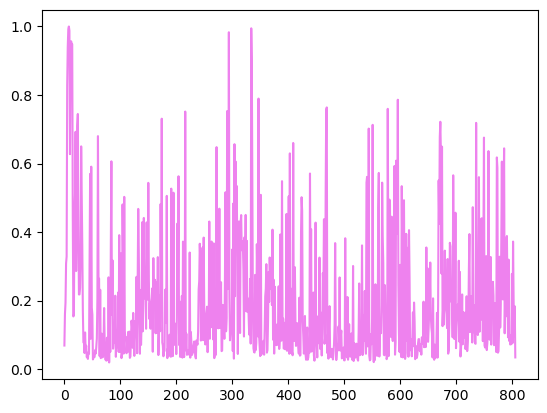

In [167]:
plt.plot(sites_with_dists['Hellinger.Dists'].values, color='violet')